In [1]:
import linopy

In [3]:
import networkx as nx

In [11]:
import matplotlib.pyplot as plt

In [15]:
class EnergySource:
    def __init__(self, name):
        self.name = name

In [26]:
class Converter:
    def __init__(self, name, inputs, outputs):
        self.name = name
        self.inputs = inputs
        self.outputs = outputs

In [145]:
from networkx.drawing.nx_pydot import graphviz_layout

In [146]:
def create_graph(converters):
    graph = nx.DiGraph()
    
    for converter in converters:
        graph.add_node(converter.name, color='red')
        for input_ in converter.inputs:
            graph.add_node(input_.name, color='blue')
            graph.add_edge(input_.name, converter.name)
        for output in converter.outputs:
            graph.add_node(output.name, color='blue')
            graph.add_edge(converter.name, output.name)
        
    nx.draw(graph,
            pos=graphviz_layout(graph, prog="dot"),
            node_color=[node_attrs['color'] for _, node_attrs in graph.nodes(data=True)],
            with_labels=True, font_weight='bold')
    
    return graph

In [147]:
nx.spring_layout?

In [153]:
solar_pv = EnergySource(name='solar_pv')
wind = EnergySource(name='wind')
hydrogen = EnergySource(name='hydrogen')

In [154]:
converters = [
    Converter(
        name='electricity',
        inputs=[solar_pv, wind], outputs=[hydrogen]),
]

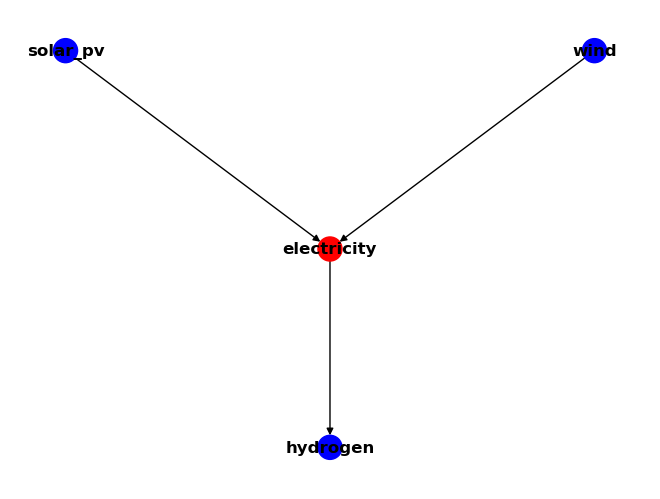

In [155]:
g = create_graph(converters)

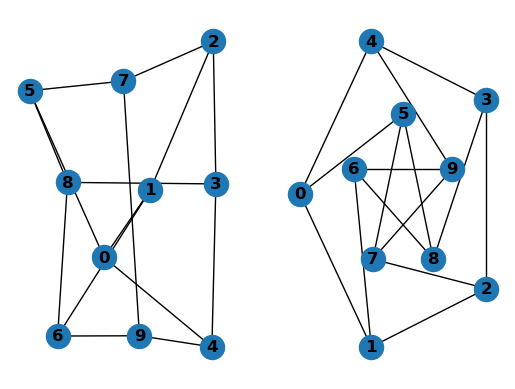

In [7]:
G = nx.petersen_graph()

subax1 = plt.subplot(121)

nx.draw(G, with_labels=True, font_weight='bold')

subax2 = plt.subplot(122)

nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')
